In [18]:
# 2023/12/17
# zhangzhong

In [19]:
import torch
from torch import nn, Tensor
from mytorch.data.mnist import MNISTDataset
import matplotlib.pyplot as plt

In [22]:
mnist = MNISTDataset()

# 实现一个函数 可以画出数张指定index和数据集的图片
def plot_images(indexs, dataset):
    for index in indexs:
        img, label = dataset[index]
        plt.figure(figsize=(2, 2))
        plt.imshow(img.permute(1, 2, 0), cmap='gray')
        plt.title(f'label: {label}')
        plt.show()

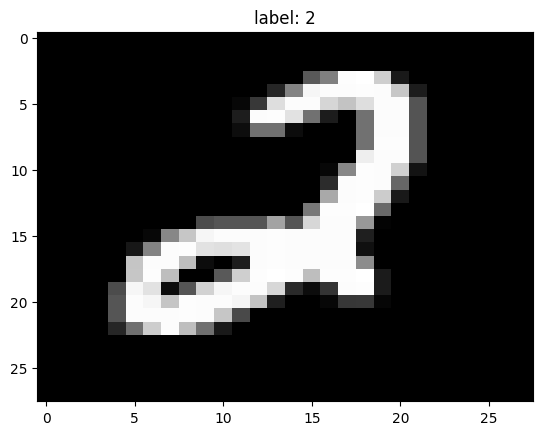

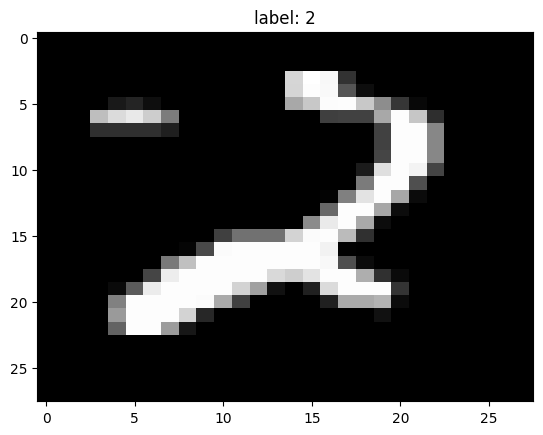

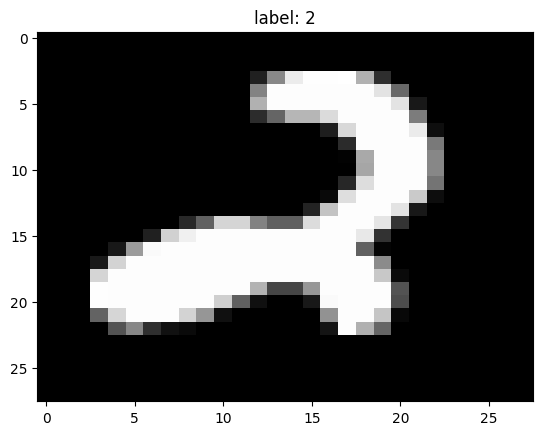

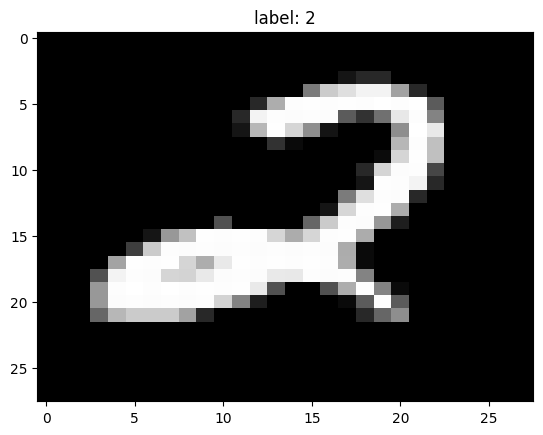

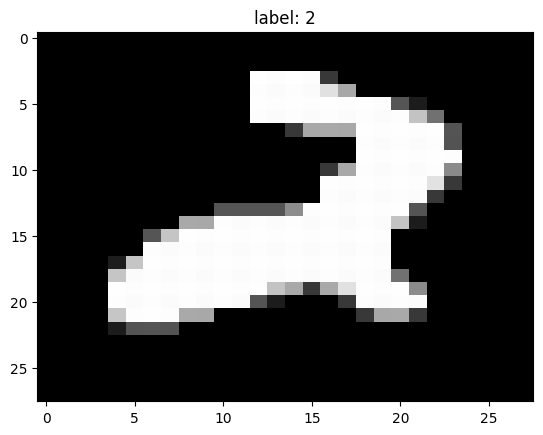

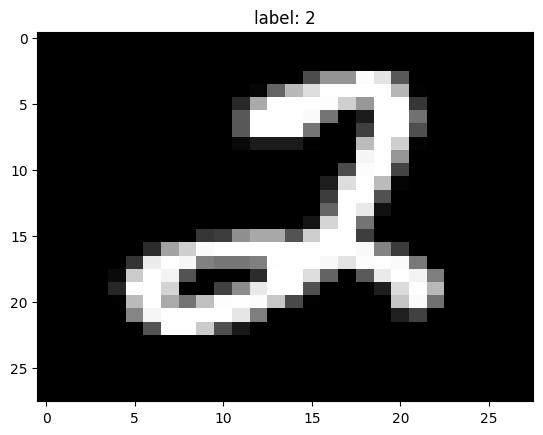

In [23]:
plot_images([233], mnist.training_data)
plot_images([5748, 7762, 9476, 9597, 6225], mnist.testing_data)

# 接下来只需要把这些图画的漂亮一些 就行了
# 再研究一下matplotlib
